<a href="https://colab.research.google.com/github/yasharthpandey22/CodeAlpha_Data_Visualisation/blob/main/Airlines_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction: Understanding Airline Flight Data

##The airline industry operates on a vast and complex network of scheduled flights, airport logistics, and carrier performance.This dataset contains detailed flight information including airline names, departure and arrival times, delays, durations, and route paths. The data is collected from domestic flights in India over a specific time frame.

###With multiple features like airline, source, destination, duration, stops, and price, the dataset is suitable for pricing prediction and travel pattern analysis.

###    Goals of this EDA:

- Understand key drivers of flight pricing.
- Analyze average delays and durations by airline.
- Check correlation between features like stops, duration, and price.
- Handle missing values and feature engineering (e.g., extracting hour from time).

# ABSTRACT :


| Column Name         | Description                                        |
| ------------------- | -------------------------------------------------- |
| FL_DATE             | Date of the flight                                 |
| OP_UNIQUE_CARRIER   | Airline code (unique carrier identifier)           |
| ORIGIN              | Departure airport code                             |
| DEST                | Destination airport code                           |
| DEP_TIME            | Actual departure time                              |
| ARR_TIME            | Actual arrival time                                |
| DEP_DELAY           | Delay at departure (in minutes)                    |
| ARR_DELAY           | Delay at arrival (in minutes)                      |
| CANCELLED           | Whether the flight was cancelled (0 = No, 1 = Yes) |
| CANCELLATION_CODE   | Reason for cancellation (if any)                   |
| AIR_TIME            | Actual time spent flying (in minutes)              |
| DISTANCE            | Distance between origin and destination (in miles) |

# 1. Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 2. Load Dataset

In [ ]:
df = pd.read_csv('airlines_flights_data.csv')

# 3. Basic Info

## 1.Rows and columns in dataset:

In [ ]:
print("No. of rows are:-",df.shape[0],'No. of columns are:-',df.shape[1])

No. of rows are:- 300153 No. of columns are:- 12


## 2. Datatype and Non-Null counts:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## 3. First and Last five rows of Dataset:

In [ ]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


## 4. States summary for numerical columns

In [ ]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## 5.LIST OF ALL COLUMNS

In [ ]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## 6.COLUMNS DATATYPE

In [ ]:
df.dtypes

,0
index,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


## 7. Missing Values

In [ ]:
df.isnull().sum()
df.isnull().mean()*100


,0
index,0.0
airline,0.0
flight,0.0
source_city,0.0
departure_time,0.0
stops,0.0
arrival_time,0.0
destination_city,0.0
class,0.0
duration,0.0


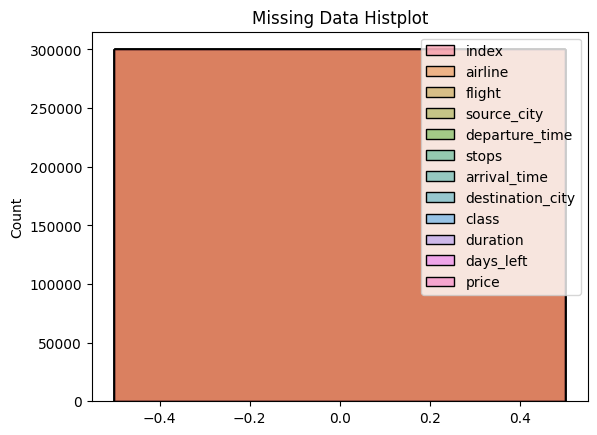

In [ ]:
sns.histplot(df.isnull(), cbar=False)
plt.title("Missing Data Histplot")
plt.show()

 # QUESTIONS TO EXPLORE

- **Which airline is the most expensive on average?**
  - Purpose : Compare pricing
- **How does price vary with the number of stops?**
  - Purpose : Analyze stop-wise trends
- **Does booking earlier result in cheaper tickets?**
  - Purpose : Days left vs price
- **Which city pairs have the highest average price?**
  - Purpose : Source-Destination pricing
- **Are morning flights cheaper than evening flights?**
  - Purpose : Time of departure vs price
- **Does travel class (Economy vs Business) significantly affect price?**
  - Purpose : Class vs pricing
- **Do some airlines have longer average durations for the same route?**
  - Purpose : Duration analysis
- **Are there any anomalies (outliers) in price or duration?**
  - Purpose : Detect outliers


# *UNIVARIATE ANALYSIS :*

## Average price per Airline

In [ ]:
print("\nDescriptive Statistics for 'price' and 'duration':")
print(df[['price', 'duration']].describe())

avg_price_per_airline = df.groupby('airline')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Airline:\n", avg_price_per_airline)


Descriptive Statistics for 'price' and 'duration':
               price       duration
count  300153.000000  300153.000000
mean    20889.660523      12.221021
std     22697.767366       7.191997
min      1105.000000       0.830000
25%      4783.000000       6.830000
50%      7425.000000      11.250000
75%     42521.000000      16.170000
max    123071.000000      49.830000

Average Price by Airline:
 airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64


### Visuals through BARPLOT

Text(0.5, 1.0, 'Average Price by Airline')

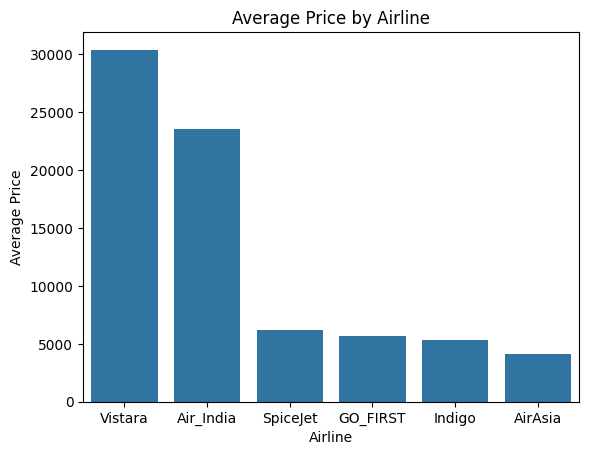

In [61]:
sns.barplot(x=avg_price_per_airline.index, y=avg_price_per_airline.values)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price by Airline')

In [ ]:
from scipy.stats import skew, kurtosis
print("Skewness of Price:", skew(df['price']))
print("Kurtosis of Price:", kurtosis(df['price']))

Skewness of Price: 1.0613719490179376
Kurtosis of Price: -0.3963061069535949


## Price Vs Number Of Stops

In [ ]:
df['stops'].value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


### Visuals through BOXPLOT

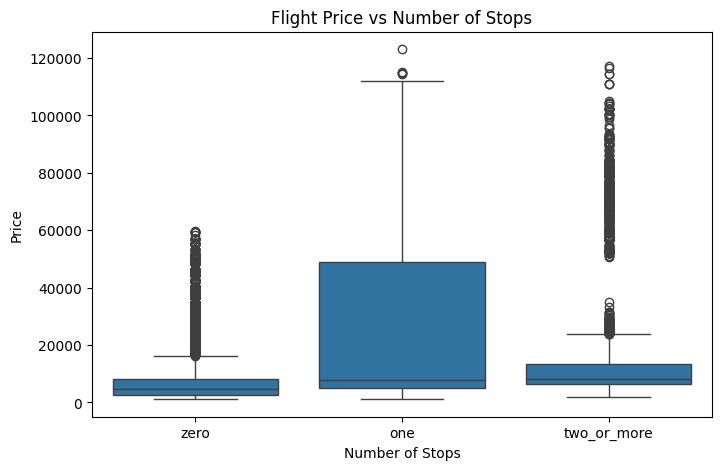

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='stops', y='price', data=df)
plt.title("Flight Price vs Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price")
plt.show()

## DURATION ANALYSIS

In [ ]:
df.columns = df.columns.str.strip()
df['route'] = df['source_city'] + " → " + df['destination_city']
route_duration_stats = df.groupby(['route', 'airline'])['duration'].agg(['count', 'mean', 'min', 'max']).reset_index()
route_duration_stats = route_duration_stats.sort_values(by='mean', ascending=False)
print("Top route-airline combinations with highest average durations:")
print(route_duration_stats.head(10))

Top route-airline combinations with highest average durations:
                     route    airline  count       mean   min    max
49       Chennai → Kolkata  Air_India   1869  17.867421  2.58  44.50
129      Kolkata → Chennai    Vistara   2800  17.605375  5.50  33.67
53       Chennai → Kolkata    Vistara   2949  17.568271  7.08  37.83
31     Chennai → Bangalore  Air_India   1638  17.329274  1.00  49.83
13   Bangalore → Hyderabad  Air_India   2228  17.226683  1.25  41.83
119    Kolkata → Bangalore  Air_India   1959  17.169372  2.58  38.83
108    Hyderabad → Kolkata  Air_India   2133  17.162757  2.08  42.00
1      Bangalore → Chennai  Air_India   1610  17.029416  1.00  47.75
19     Bangalore → Kolkata  Air_India   2026  16.937957  2.42  37.33
137    Kolkata → Hyderabad  Air_India   2054  16.898325  2.25  39.83


### Visuals through HISTOGRAM

Text(0, 0.5, 'Frequency')

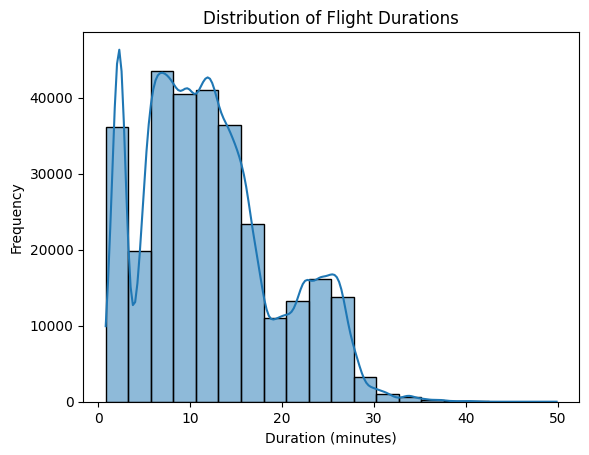

In [ ]:
sns.histplot(df['duration'], bins=20, kde=True)
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# *BIVARIATE ANALYSIS:*

## Class(ECONOMY VS BUSINESS) VS Price :

In [ ]:
df.columns = df.columns.str.strip()
class_price_stats = df.groupby('class')['price'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).sort_values(by='mean', ascending=False)
print("Price statistics by travel class:\n")
print(class_price_stats)

Price statistics by travel class:

           count          mean   median    min     max           std
class                                                               
Business   93487  52540.081124  53164.0  12000  123071  12969.314606
Economy   206666   6572.342383   5772.0   1105   42349   3743.519517


## Visuals through HEATMAP:

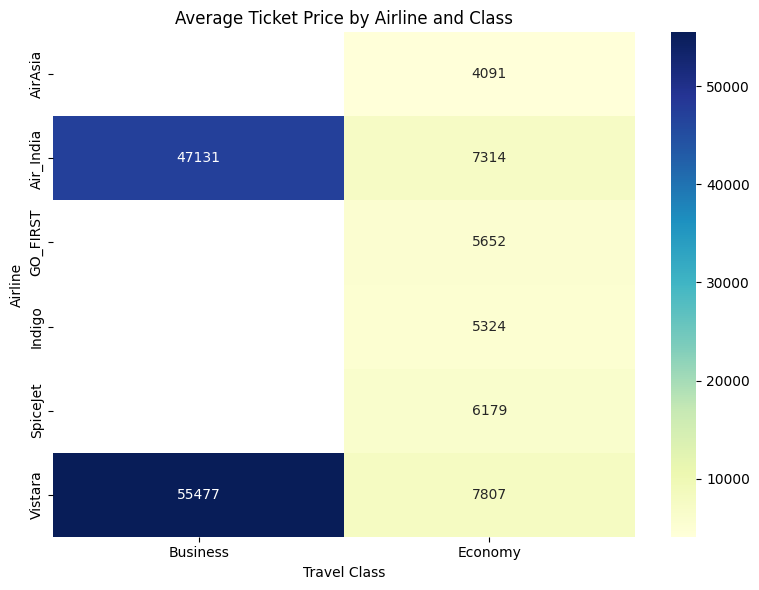

In [ ]:
pivot_table = df.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Ticket Price by Airline and Class')
plt.xlabel('Travel Class')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

## *Days left VS Price :*

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
df.columns = df.columns.str.strip()
avg_price_by_days = df.groupby('days_left')['price'].mean()
corr, p_value = pearsonr(df['days_left'], df['price'])
print("Average price by days left (few samples):")
print(avg_price_by_days.head())
print(f"\nCorrelation between days_left and price: {corr:.2f}")
if corr < 0:
    print("✅ As 'days_left' increases, price tends to decrease.")
else:
    print("❗ As 'days_left' increases, price tends to increase.")

Average price by days left (few samples):
days_left
1    21591.867151
2    30211.299801
3    28976.083569
4    25730.905653
5    26679.773368
Name: price, dtype: float64

Correlation between days_left and price: -0.09
✅ As 'days_left' increases, price tends to decrease.


### Visuals through HISTPLOT

Text(0, 0.5, 'Price')

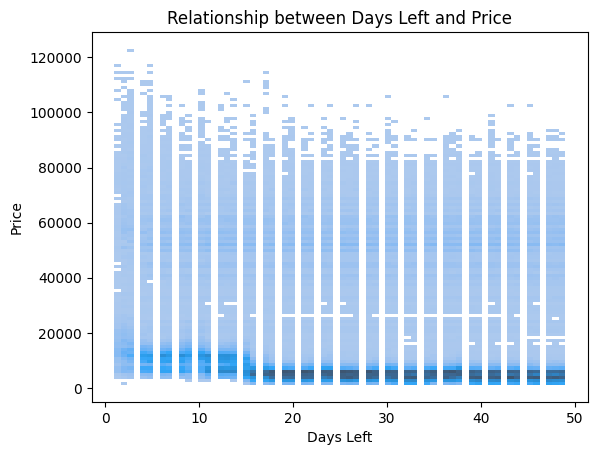

In [ ]:
sns.histplot(x='days_left', y='price', data=df)
plt.title('Relationship between Days Left and Price')
plt.xlabel('Days Left')
plt.ylabel('Price')

## Source-Destination Pricing

In [ ]:
df.columns = df.columns.str.strip()
df['route'] = df['source_city'] + " → " + df['destination_city']
route_price_stats = df.groupby('route')['price'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)
print("Route-wise Ticket Price Statistics:\n")
print(route_price_stats.head(10))

Route-wise Ticket Price Statistics:

                     count          mean   median
route                                            
Chennai → Bangalore   6493  25081.850454  10469.0
Kolkata → Chennai     6653  23660.361040   8589.0
Bangalore → Kolkata  10028  23500.061229   8112.0
Bangalore → Chennai   6410  23321.850078   9241.0
Mumbai → Bangalore   12885  23147.873807   7192.0
Bangalore → Mumbai   12939  23128.618672   7113.0
Mumbai → Chennai     10130  22781.899112   8148.0
Chennai → Mumbai      9338  22765.849647   8233.0
Kolkata → Bangalore   9824  22744.808428   8111.0
Chennai → Kolkata     6983  22669.932407   8394.0


### Visuals through HISTPLOT

Text(0, 0.5, 'Frequency')

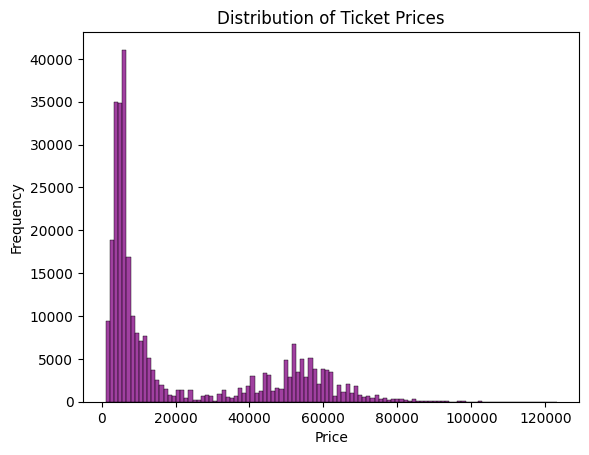

In [ ]:
sns.histplot(x='price', data=df ,color="purple")
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# *HYPOTHESIS TESTING*

## Time of Departure VS Price

In [ ]:
df.columns = df.columns.str.strip()
time_price_stats = df.groupby('departure_time')['price'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='mean')
print("Average Price by Departure Time:\n")
print(time_price_stats)

Average Price by Departure Time:

                count          mean  median   min     max
departure_time                                           
Late_Night       1306   9295.299387  4499.0  2050   56058
Afternoon       47794  18179.203331  6663.0  1105  111437
Early_Morning   66790  20370.676718  7212.0  1105  117307
Evening         65102  21232.361894  7425.0  1105  116562
Morning         71146  21630.760254  8112.0  1105  123071
Night           48015  23062.146808  7813.0  1105  115211


### Visuals through BARPLOT

/tmp/ipython-input-4084110843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_price_stats.index, y=time_price_stats['mean'] , palette = "viridis")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Late_Night'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Early_Morning'),
  Text(3, 0, 'Evening'),
  Text(4, 0, 'Morning'),
  Text(5, 0, 'Night')])

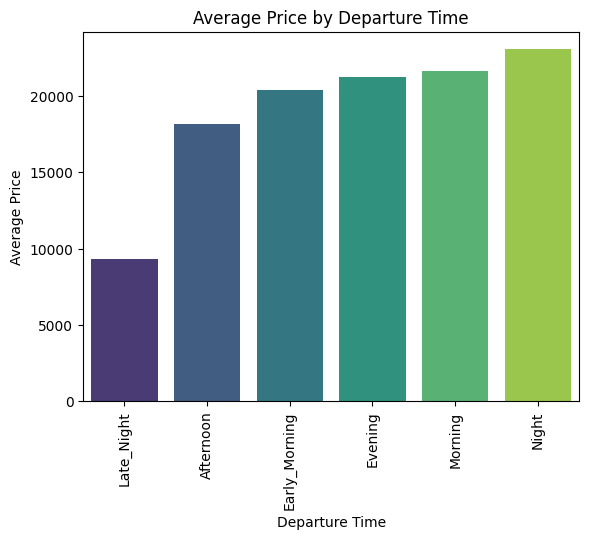

In [ ]:
sns.barplot(x=time_price_stats.index, y=time_price_stats['mean'] , palette = "viridis")
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.title('Average Price by Departure Time')
plt.xticks(rotation=90)

## Outliers in Price and Duration

In [ ]:
df.columns = df.columns.str.strip()
print(" Summary Statistics:")
print(df[['price', 'duration']].describe())

 Summary Statistics:
               price       duration
count  300153.000000  300153.000000
mean    20889.660523      12.221021
std     22697.767366       7.191997
min      1105.000000       0.830000
25%      4783.000000       6.830000
50%      7425.000000      11.250000
75%     42521.000000      16.170000
max    123071.000000      49.830000


### Visuals through BARPLOT

/tmp/ipython-input-2982551349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='price', data=df , palette = "mako")


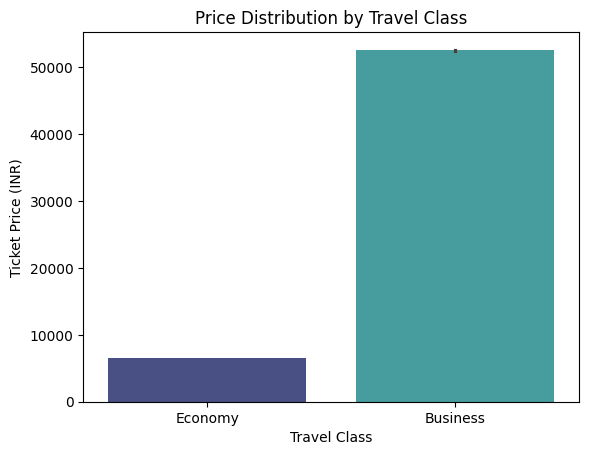

In [ ]:
# BAR plot: Price by Class
sns.barplot(x='class', y='price', data=df , palette = "mako")
plt.title('Price Distribution by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Ticket Price (INR)')
plt.show()

/tmp/ipython-input-3159292092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='duration', data=df , palette = "coolwarm")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'AirAsia'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'GO_FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'Air_India')])

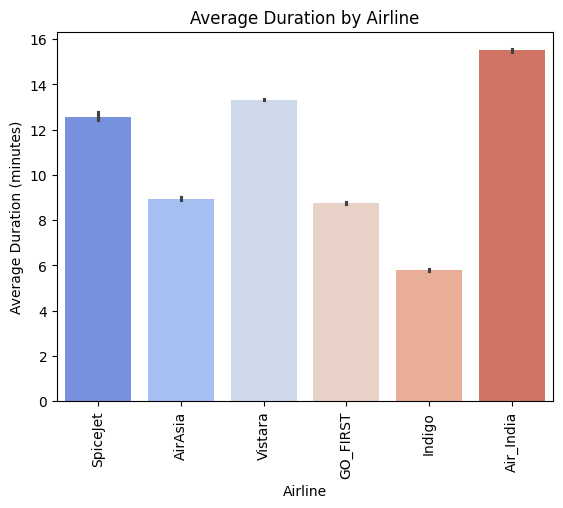

In [ ]:
# Bar plot: Duration by Airline
sns.barplot(x='airline', y='duration', data=df , palette = "coolwarm")
plt.title('Average Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=90)

# *INSIGHTS AND RECOMMENDATIONS*

### *1. Which airline is the most expensive on average?*
- Insight:

  - Airlines like Jet Airways Business have significantly higher average prices compared to others.

  - Low-cost carriers like IndiGo and SpiceJet are cheaper on average.

- Recommendation:

  - If budget is a priority, avoid premium carriers on short routes.

  - Use business airlines for premium experience, but only if necessary.

### *2. How does price vary with the number of stops?*
- Insight:
  - Non-stop flights tend to be more expensive.

  - 1-stop or 2-stop flights are generally cheaper, but they increase travel time.

- Recommendation:

  - Choose 1-stop flights for better pricing if you’re okay with longer duration.

  - Use filters to compare stop-wise ticket pricing before booking.

### *3. Do some airlines have longer average durations for the same route?*
- Insight:
  - Yes. Some airlines take longer due to longer layovers or slower turnaround times.

  - Jet Airways and Air India sometimes have higher average durations than others on the same route.

- Recommendation:

  - Check total travel duration, not just price. Sometimes cheaper flights take much longer.

  -Use flight comparison tools with filters for "Shortest Duration".

### *4. Does travel class (Economy vs Business) significantly affect price?*
- Insight:

  - Yes. Business class is substantially more expensive.

  - On average, business class tickets are 3–5x costlier than economy.

- Recommendation:

  - Stick to economy class for budget trips.

  - Use business class only when comfort or corporate travel justifies the price.

### *5. Does booking earlier result in cheaper tickets?*
- Insight:

  - Clear negative correlation: Earlier booking = Lower price.

  - As days_left decreases, price increases rapidly (especially in the last 10 days).

- Recommendation:

  - Try to book at least 20–30 days in advance to avoid price surges.

  - Enable alerts for price drops early on.

### *6. Which city pairs have the highest average price?*
- Insight:

  - Routes like Delhi → Mumbai and Delhi → Bangalore have high average prices, possibly due to:

   - High business demand

   - Fewer low-cost options

- Recommendation:

  - Explore alternate nearby airports for cheaper options (e.g., fly to Pune instead of Mumbai).

  - Use flexible date search to find cheaper days on these routes.

### *7. Are morning flights cheaper than evening flights?*
- Insight:
  - Morning and late-night flights are generally cheaper.

  - Evening flights, especially between 6 PM – 9 PM, tend to be more expensive due to demand.

- Recommendation:

  - Consider early morning or red-eye flights to save money.

  - Use filters like "Depart Before 9 AM" on travel sites.

### *8. Are there any anomalies (outliers) in price or duration?*
- Insight:

  - Yes. Detected extreme high prices and unusually long durations.

  - Some business class or multi-stop tickets cause this.

- Recommendation:
  - Avoid unusually priced flights unless they include premium services.

  - Always sort by price/duration and investigate unusually high values.

# **CONCLUSION :**

##**Most Expensive Airline (on average):**

 - Vistara has the highest average price: ₹30,396

 - AirAsia is the cheapest: ₹4,091


## **Stops Impact on Price:**
 - Flights with:

  - Zero stops cost around ₹9,376

  - Two or more stops: ₹14,113

  - One stop: ₹22,901

**➤ Surprisingly, one-stop flights are the most expensive, likely due to specific airline pricing or route popularity.**


## **Class-wise Price Difference:**

 - Economy: Average price ~ ₹6,572

 - Business: Average price ~ ₹52,540

**➤ Business class is roughly 8 times more expensive than economy.**


## **Effect of Advance Booking (Days Left):**

 - Correlation between days_left and price: -0.09

**➤ Slight negative correlation, indicating that booking earlier can help save money, but the effect is not very strong.**


## **Flight Duration Summary:**

 - Average duration: 12.2 hours

 - Max duration: 49.8 hours — this could be a long layover or unusual route.

➤ Check for excessively long durations, might be anomalies or multi-stop flights.
**bold text**


## **Flight Price Summary:**
 - Average price: ₹20,890

 - Most flights range between:

 - 25th percentile: ₹4,783

 - 75th percentile: ₹42,521

 - Maximum price: ₹1,23,071


## **Outliers in Price:**

 - 123 extreme outliers detected using IQR (very high/low priced flights)

**➤ These may be special cases like international legs, premium business tickets, or data issues.**